# Breast Cancer Detection using Machine Learning

Breast cancer is one of the most common cancers affecting women globally. Early and accurate detection is crucial for effective treatment and increased survival rates. In this notebook, we will build a machine learning pipeline to predict whether a tumor is malignant or benign based on features computed from a digitized image of a breast mass.

## Workflow Overview:

1. Data loading and preprocessing

2. Exploratory data analysis (EDA)

3. Feature engineering (Optional)

4. Data splitting and feature scaling

5. Model building, hyperparameter tuning, and cross-validation

6. Comprehensive model evaluation

## Import Required Libraries
We start by importing necessary libraries for data analysis and machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Load the Dataset
Let's load the dataset and take a quick look at its structure and features.

In [2]:
#load data on dataframe
df = pd.read_csv('data.csv')

In [3]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#count of rows and columns
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Dataset Overview: Breast Cancer Wisconsin (Diagnostic) Dataset

This dataset is a well-known public dataset from the UCI Machine Learning Repository. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. Its primary goal is to classify a tumor as either benign (B) or malignant (M).

**Key Features:**
The dataset has 30 numerical features computed from the image, describing characteristics of the cell nuclei. These include:
* `radius` (mean of distances from center to points on the perimeter)
* `texture` (standard deviation of gray-scale values)
* `perimeter`
* `area`
* `smoothness` (local variation in radius lengths)
* `compactness` (perimeter^2 / area - 1.0)
* `concavity` (severity of concave portions of the contour)
* `concave points` (number of concave portions of the contour)
* `symmetry`
* `fractal_dimension` ("coastline approximation" - 1)

For each of these 10 core features, three measures are reported:
* `_mean`: The mean value of the feature.
* `_se`: The standard error of the feature.
* `_worst`: The "worst" or largest (mean of the three largest values) value of the feature.

**Target Variable:**
* `diagnosis`: The dependent variable, indicating whether the tumor is Malignant (M) or Benign (B).
* `id`: Patient identification number (to be dropped).
* `Unnamed: 32`: An empty column (to be dropped).

# Target variable Distribution

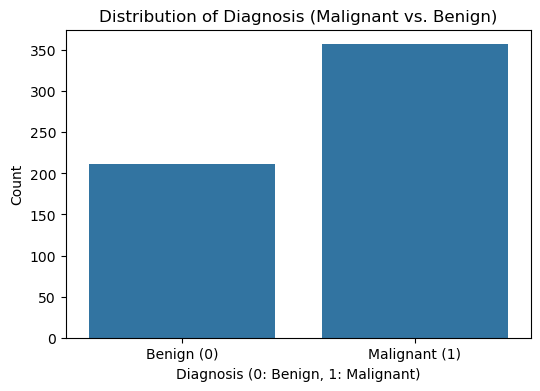

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis (0: Benign, 1: Malignant)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Benign (0)', 'Malignant (1)'])
plt.show()

**Observation:** The dataset shows a slight imbalance, with more benign cases than malignant ones. This is important to consider when evaluating model performance, as simple accuracy might be misleading for imbalanced datasets.

## Data Cleaning
We'll handle missing values, drop unnecessary columns, and encode the target variable.

In [8]:
#count number of null(empty) values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
# Drop the column with null values
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [10]:
# Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts() 

diagnosis
B    357
M    212
Name: count, dtype: int64

In [11]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## EDA - Feature Distributions

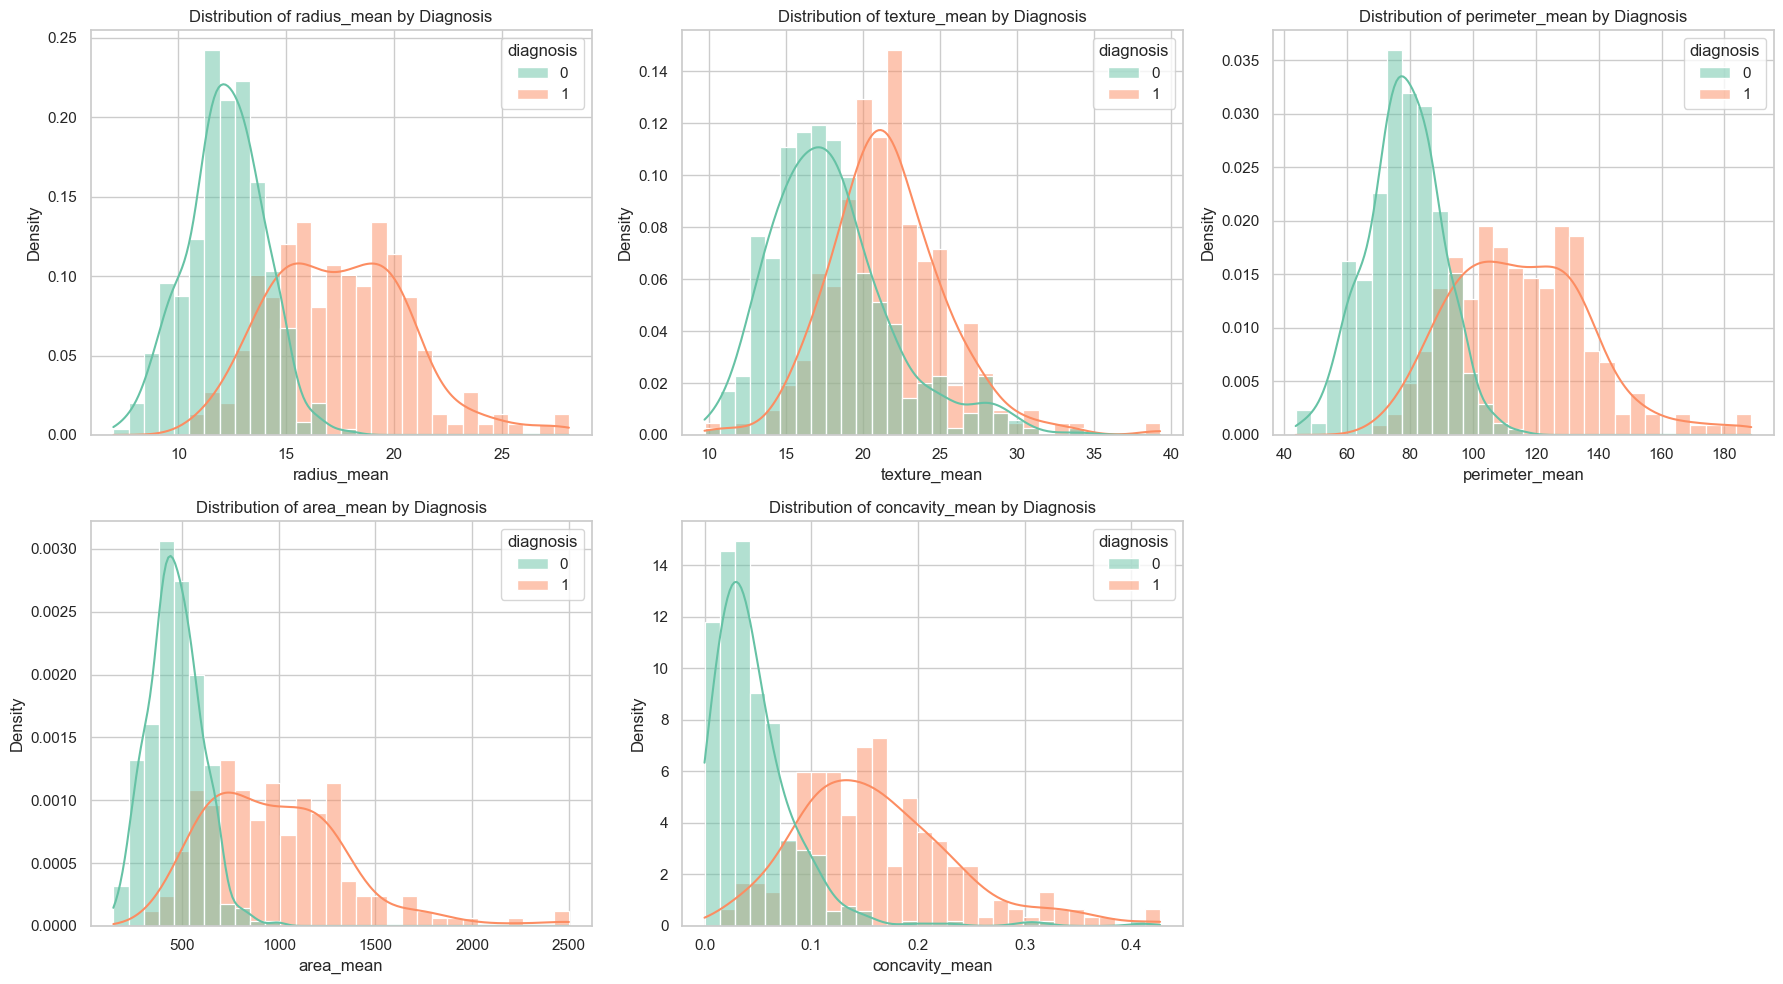

In [12]:
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

sns.set(style="whitegrid")

# Create a 2x3 subplot for 5 features
plt.figure(figsize=(18, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(
        data=df,
        x=feature,
        hue='diagnosis',
        kde=True,
        bins=30,
        palette='Set2',
        stat='density',
        common_norm=False
    )
    plt.title(f'Distribution of {feature} by Diagnosis', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

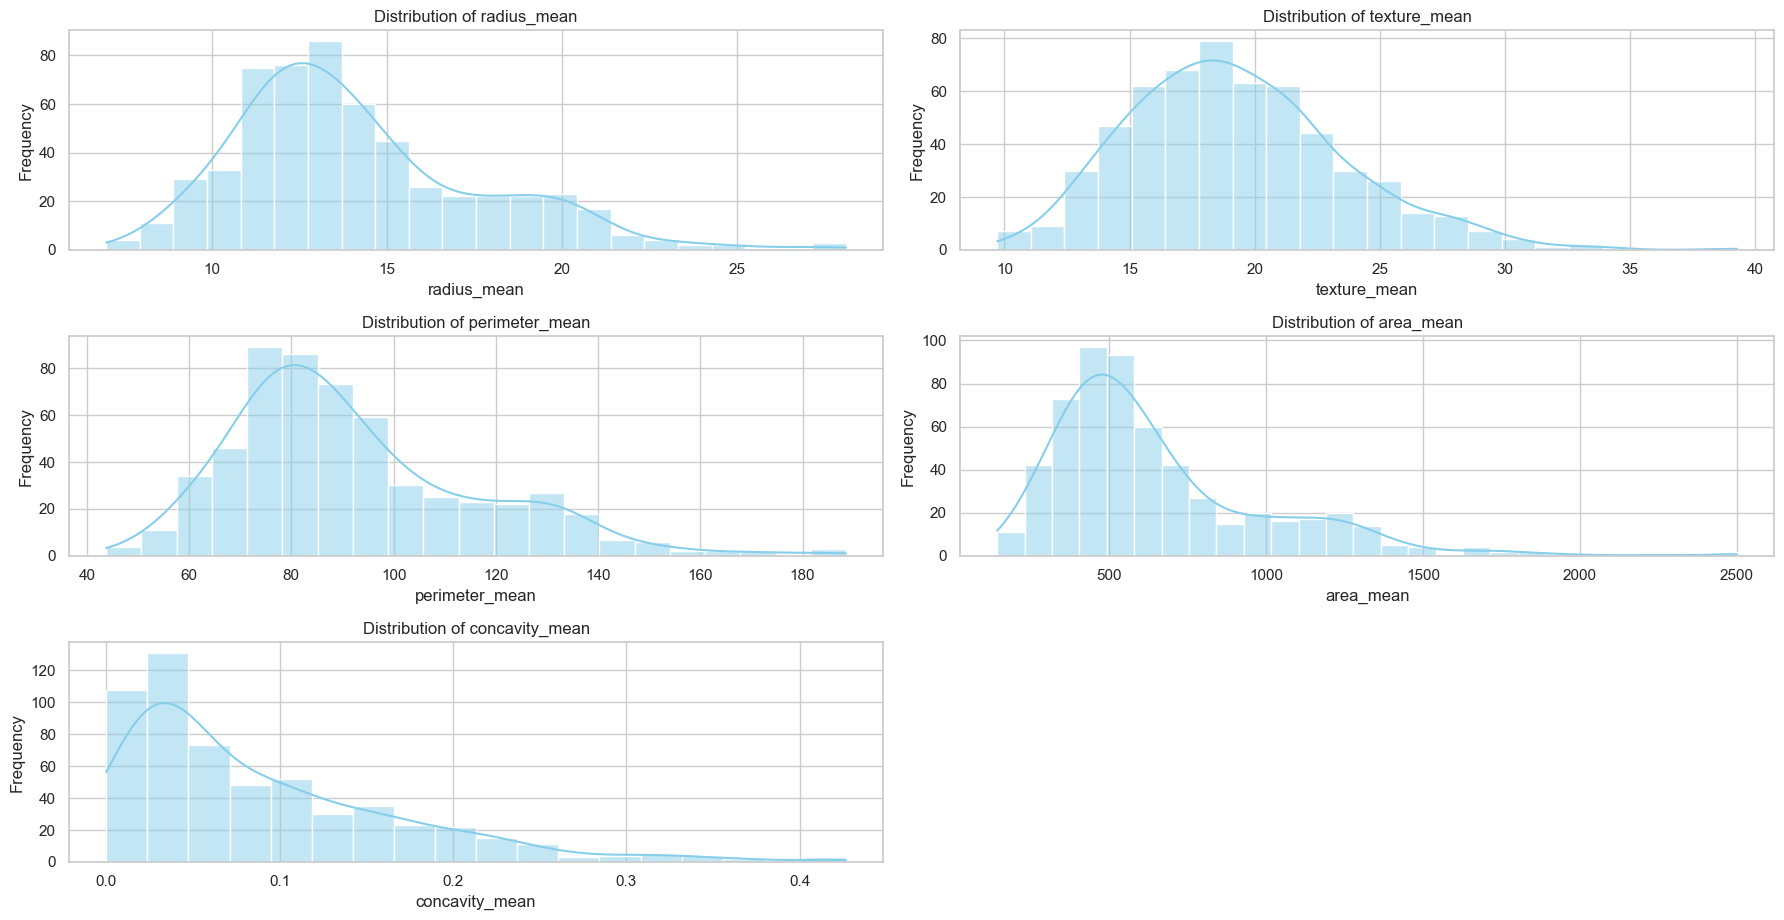

In [13]:
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

plt.figure(figsize=(18, 15))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

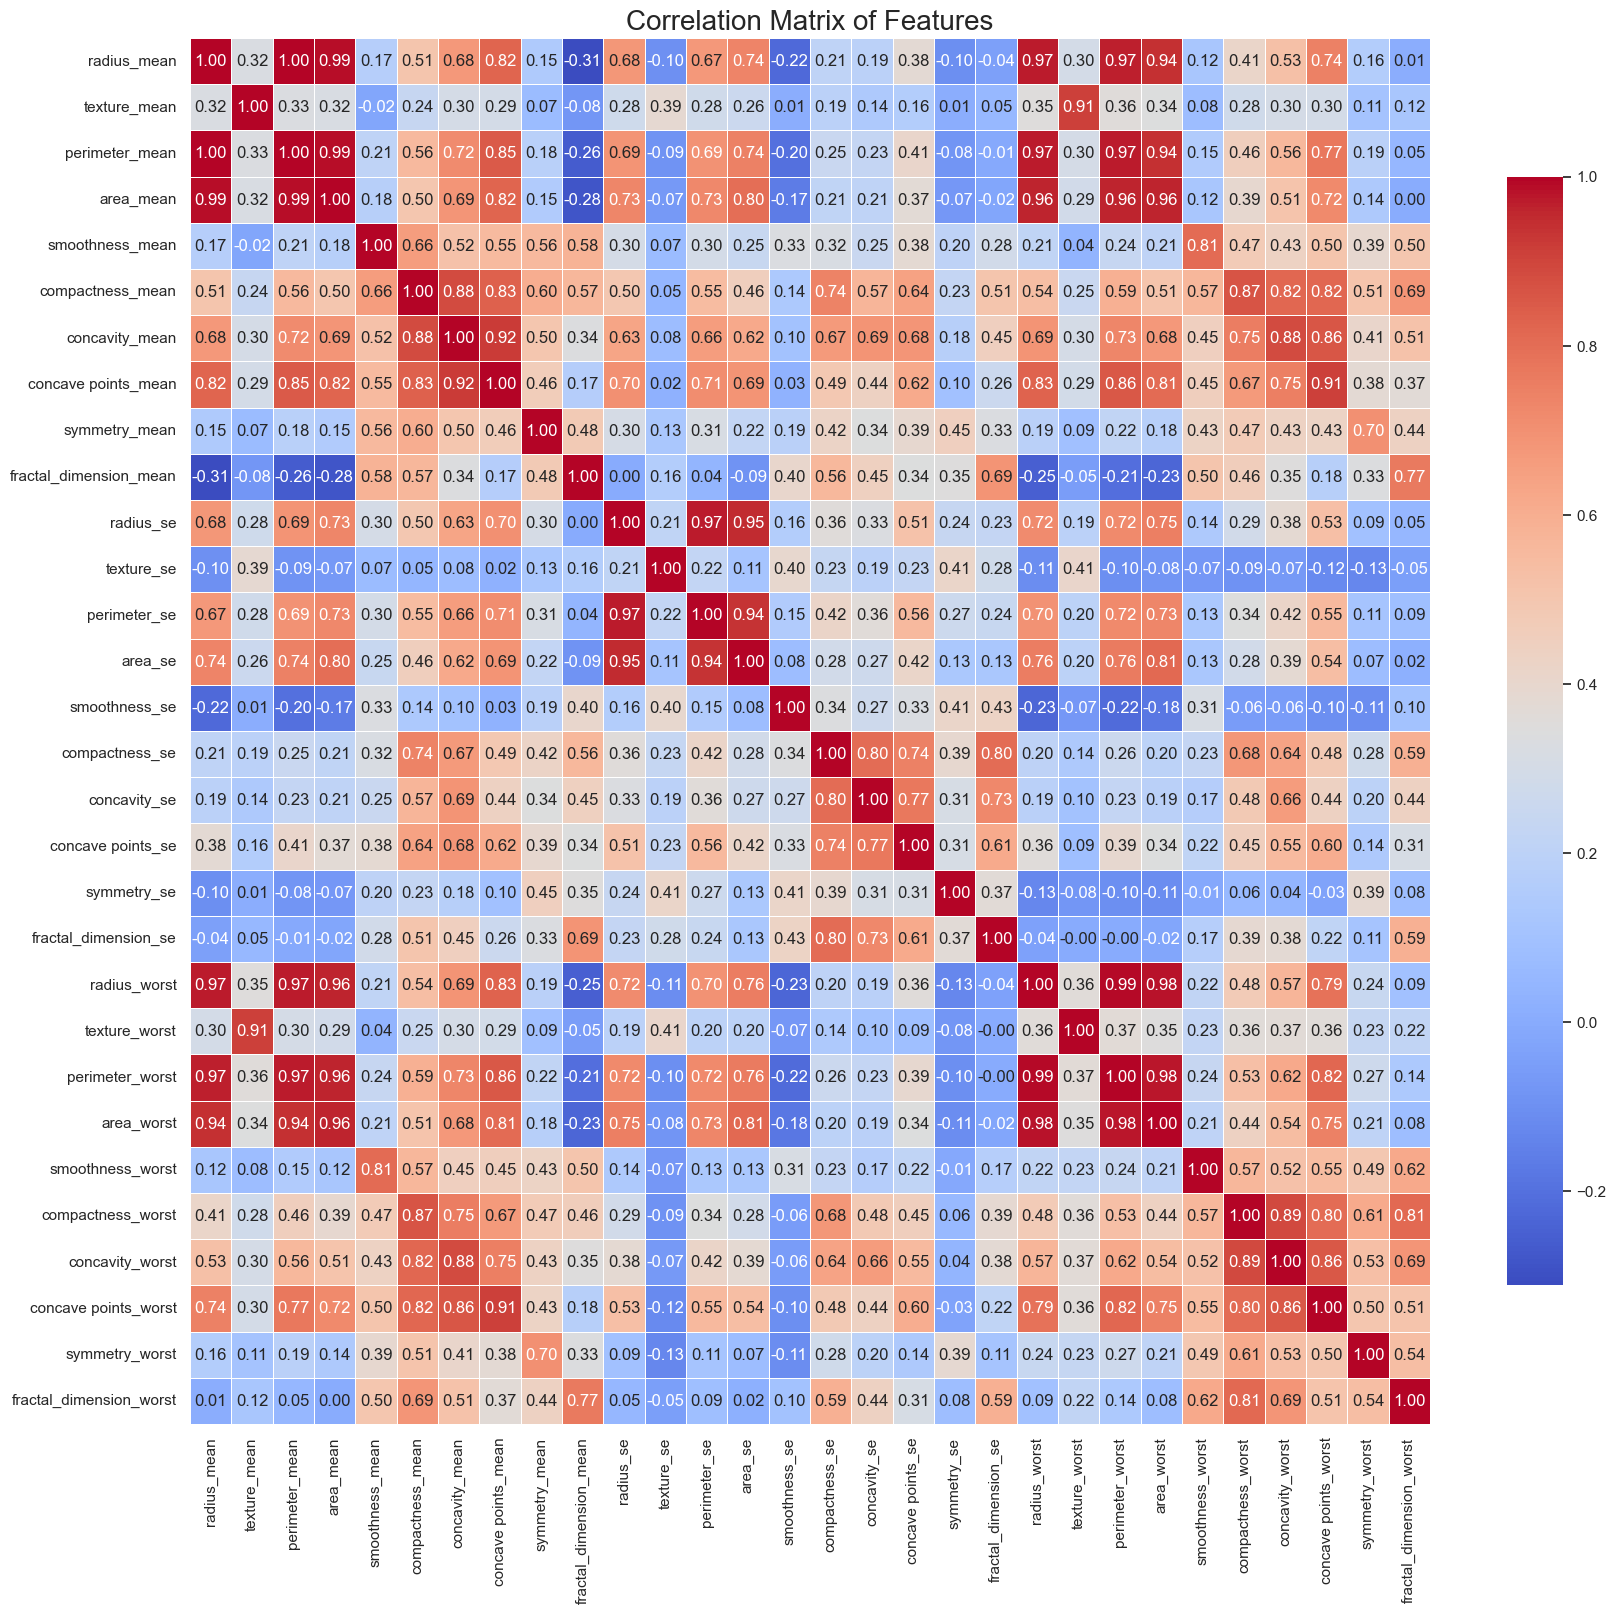

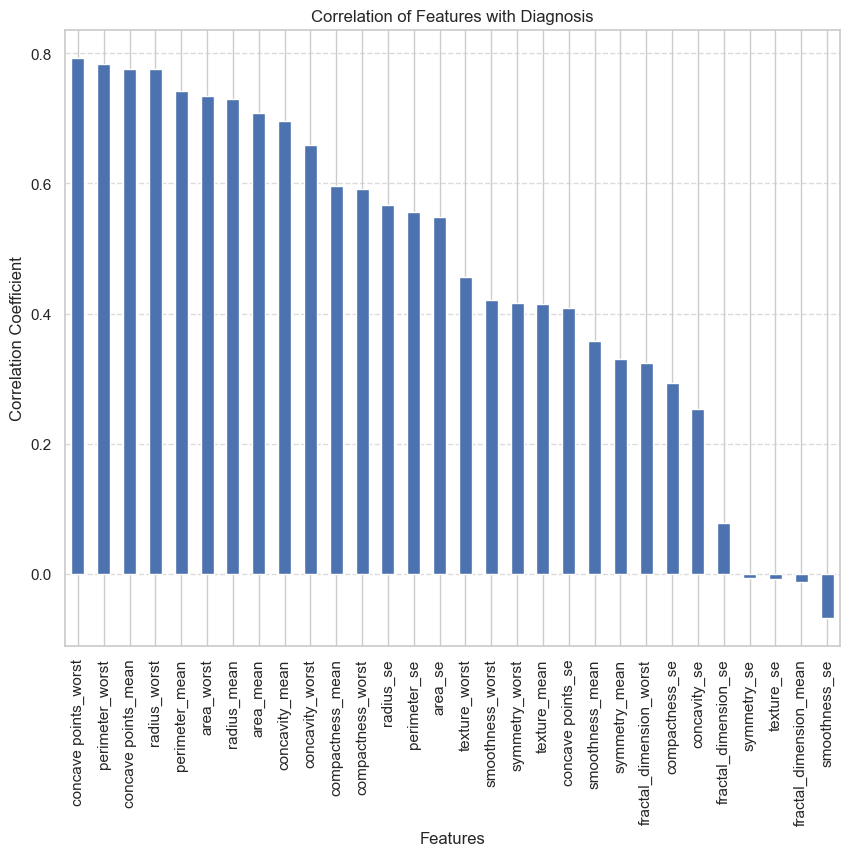

In [14]:
# Calculate the correlation matrix
correlation_matrix = df.drop('diagnosis', axis=1).corr() # Drop 'diagnosis' to see feature-feature correlations

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features', fontsize=20)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# Also, check correlation with the target variable
plt.figure(figsize=(10, 8))
df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation of Features with Diagnosis')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Observations:**
* The heatmap reveals high positive correlations among many features, especially within groups like `radius`, `perimeter`, and `area` (mean, se, worst versions). This multicollinearity is expected in this dataset, as these features are geometrically related. While some models handle this well, others (like linear models) might be affected.
* The bar plot of correlations with `diagnosis` highlights the most influential features. `concave points_worst`, `perimeter_worst`, `radius_worst`, `area_worst`, `concave points_mean`, and `perimeter_mean` show very strong positive correlations with a malignant diagnosis (1). This confirms their importance for prediction.

## Data Splitting (Training/Testing) & Feature Scaling 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
# Ensure 'id' and 'Unnamed: 32' are already dropped and 'diagnosis' is encoded.
X = df.drop('diagnosis', axis=1) # All columns except 'diagnosis'
y = df['diagnosis']             # The target column

# Split the data into training and testing sets
# Stratify ensures that the proportion of target classes is the same in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform both training and testing data
# This prevents data leakage from the test set into the training process.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames with original column names (optional, but good for inspection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


## Model Building and Evaluation

We will now build and evaluate machine learning models for breast cancer prediction. For this binary classification task, we will choose two popular and effective algorithms:

1.  **Logistic Regression:**
    * **Justification:** A simple yet powerful linear model often used as a baseline for classification tasks. It's computationally efficient, interpretable, and works well when there's a linear relationship between features and the log-odds of the target variable. Its output can be interpreted as probabilities.

2.  **Random Forest Classifier:**
    * **Justification:** An ensemble learning method that builds multiple decision trees and merges their predictions to get a more accurate and stable prediction. It's robust to overfitting, can handle non-linear relationships, and implicitly performs feature selection. It generally offers high performance and handles high-dimensional data well.

Before training, we will perform hyperparameter tuning and cross-validation to find the best model configurations and ensure robust performance estimates.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# --- Logistic Regression ---
print("--- Training and Tuning Logistic Regression ---")

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs'] # Algorithms to use in the optimization problem
}

# Initialize Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Initialize GridSearchCV
grid_search_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the scaled training data
grid_search_logreg.fit(X_train_scaled, y_train)

# Get the best estimator
best_logreg = grid_search_logreg.best_estimator_

print(f"Best parameters for Logistic Regression: {grid_search_logreg.best_params_}")
print(f"Best cross-validation accuracy for Logistic Regression: {grid_search_logreg.best_score_:.4f}")

# Evaluate on the test set
y_pred_logreg = best_logreg.predict(X_test_scaled)
y_prob_logreg = best_logreg.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC curve

# Cross-validation score for the best Logistic Regression model
cv_scores_logreg = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Logistic Regression 5-fold CV accuracies: {cv_scores_logreg}")
print(f"Logistic Regression Mean CV accuracy: {cv_scores_logreg.mean():.4f} (+/- {cv_scores_logreg.std() * 2:.4f})")


# --- Random Forest Classifier ---
print("\n--- Training and Tuning Random Forest ---")

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split
    'max_depth': [None, 10, 20], # Maximum number of levels in tree
    'min_samples_split': [2, 5], # Minimum number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2] # Minimum number of data points allowed in a leaf node
}

# Initialize Random Forest model
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the scaled training data
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best estimator
best_rf = grid_search_rf.best_estimator_

print(f"Best parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best cross-validation accuracy for Random Forest: {grid_search_rf.best_score_:.4f}")

# Evaluate on the test set
y_pred_rf = best_rf.predict(X_test_scaled)
y_prob_rf = best_rf.predict_proba(X_test_scaled)[:, 1] # Probabilities for ROC curve

# Cross-validation score for the best Random Forest model
cv_scores_rf = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"Random Forest 5-fold CV accuracies: {cv_scores_rf}")
print(f"Random Forest Mean CV accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

--- Training and Tuning Logistic Regression ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.9736
Logistic Regression 5-fold CV accuracies: [0.96703297 1.         0.94505495 0.97802198 0.97802198]
Logistic Regression Mean CV accuracy: 0.9736 (+/- 0.0357)

--- Training and Tuning Random Forest ---
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.9626
Random Forest 5-fold CV accuracies: [1.         0.98901099 0.93406593 0.97802198 0.91208791]
Random Forest Mean CV accuracy: 0.9626 (+/- 0.0675)


## Model Evaluation


--- Model Evaluation on Test Set ---
Test Accuracy of Logistic Regression: 0.9825
Test Accuracy of Random Forest: 0.9737

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



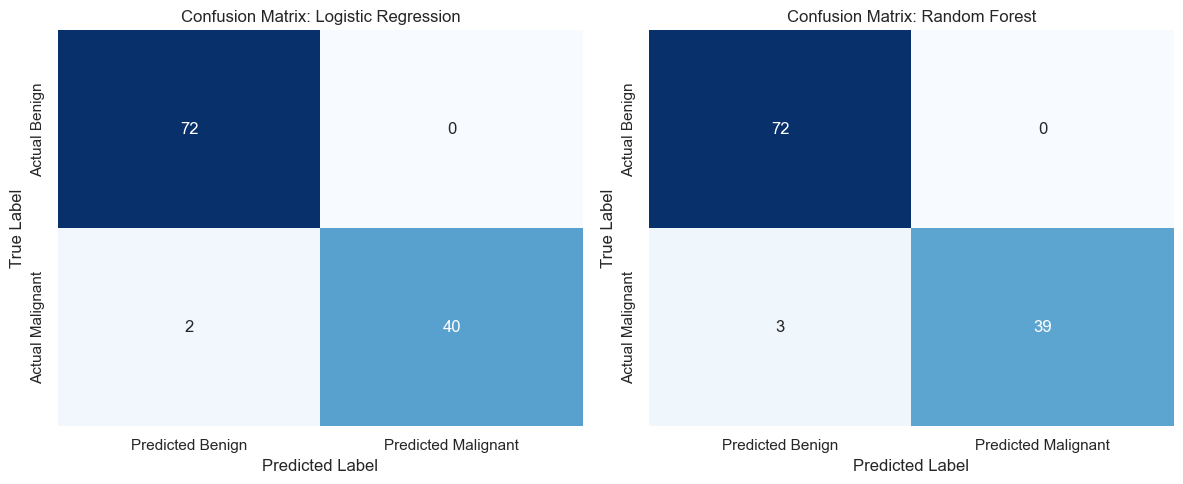

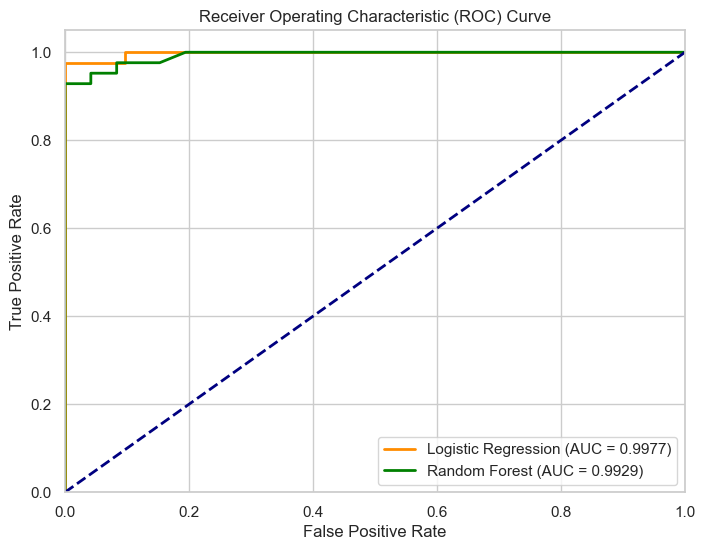


AUC for Logistic Regression: 0.9977
AUC for Random Forest: 0.9929


In [17]:
# --- Evaluation Metrics ---

print("\n--- Model Evaluation on Test Set ---")

# Overall Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Test Accuracy of Logistic Regression: {accuracy_logreg:.4f}")
print(f"Test Accuracy of Random Forest: {accuracy_rf:.4f}")

# Classification Report
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# --- Confusion Matrix ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'], ax=axes[0])
axes[0].set_title('Confusion Matrix: Logistic Regression')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'], ax=axes[1])
axes[1].set_title('Confusion Matrix: Random Forest')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# --- ROC Curve and AUC ---
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nAUC for Logistic Regression: {roc_auc_logreg:.4f}")
print(f"AUC for Random Forest: {roc_auc_rf:.4f}")


**Interpretation of Evaluation Metrics:**

- **Accuracy:** Overall correctness of the model. While useful, it can be misleading in imbalanced datasets.

- Precision (Positive Predictive Value): Of all instances predicted as positive (Malignant), what percentage are actually positive? High precision reduces false positives (i.e., misclassifying a benign tumor as malignant, leading to unnecessary anxiety and further tests).

- Recall (Sensitivity/True Positive Rate): Of all actual positive instances (Malignant), what percentage were correctly identified? High recall is crucial in cancer detection as it minimizes false negatives (i.e., missing a malignant tumor, which has severe consequences).

- F1-Score: The harmonic mean of precision and recall. It provides a single metric that balances both.

- Confusion Matrix: A detailed breakdown of correct and incorrect predictions.

    - True Positive (TP): Correctly predicted as Malignant.

    - True Negative (TN): Correctly predicted as Benign.

    - False Positive (FP): Predicted as Malignant but actually Benign (Type I error).

    - False Negative (FN): Predicted as Benign but actually Malignant (Type II error).
 
      
    In breast cancer detection, minimizing False Negatives (FN) is typically paramount, even if it means tolerating a few more False Positives (FP).

- ROC Curve and AUC (Area Under the Curve): The ROC curve plots the True Positive Rate (Recall) against the False Positive Rate at various threshold settings. AUC measures the entire area underneath the ROC curve. A higher AUC (closer to 1) indicates a better ability of the model to distinguish between the two classes. It's a robust metric for imbalanced datasets.

**Overall Assessment:**
Based on the results (AUC for Logistic Regression: 0.9977, AUC for Random Forest: 0.9929), both Logistic Regression and Random Forest models performed exceptionally well on this dataset. The Logistic Regression model achieved a slightly higher AUC, indicating its superior discriminative power in this specific instance. This is a positive outcome for a medical diagnostic application, as it suggests both models are highly effective at distinguishing between benign and malignant cases, with a strong ability to minimize false negatives.